# TP3 - Analyse de données

## Objectif
On va faire un peu d'analyse de données, avec ou sans numpy et ses matrices.  
Au passage, on va voir comment faire un peu de visualisation en Python, en utilisant le module matplotlib (librairie en plus, mais disponible avec tous les outils scientifiques)  
La commande essentielle, plot, prend deux listes de coordonnées (abscisses et ordonnées), et trace la courbe correspondante reliant les points. Spyder gère automatiquement l'affichage dans sa console IPython.

## Bibliothèques logicielles utilisées
Pour garantir le bon fonctionnement du code, lancez prélablement l'installation des bibliothèques logicielles suivantes :

In [61]:
! pip install numpy 
! pip install matplotlib
! pip install ipython
! pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\agib3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\agib3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\agib3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\agib3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Quelques bases

Parabole:


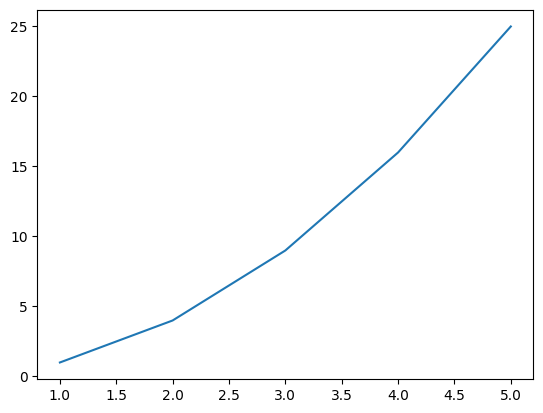

In [62]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[1,4,9,16,25])
print("Parabole:")

En option, on peut définir une couleur et une forme avec une chaine en 3e argument ("r" pour red, "o" pour un point)

Parabole


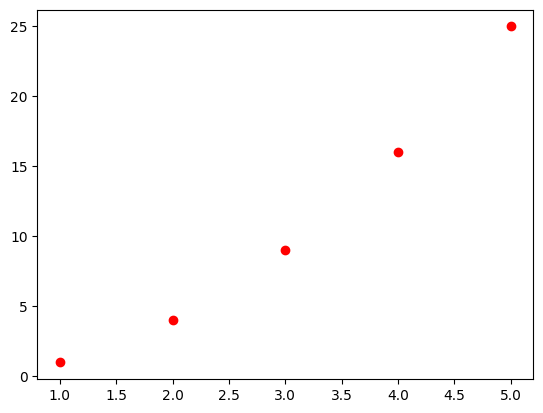

In [63]:
plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole")

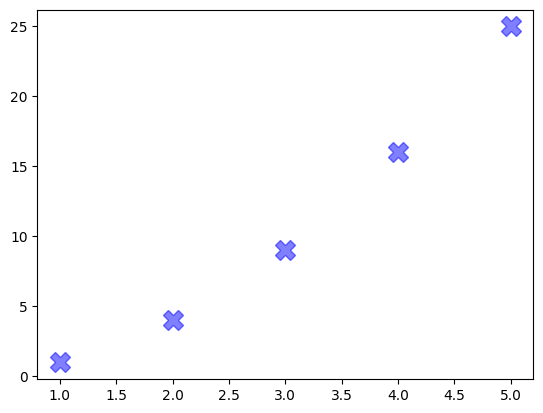

In [4]:
#quelques variantes
plt.plot([1,2,3,4,5],[1,4,9,16,25],"bX",markersize=15,alpha=0.5)
print()

Pour contrôler un peu l'affichage, on peut fixer les extrémités des axes, et les forcer à être à la même échelle

Parabole encore


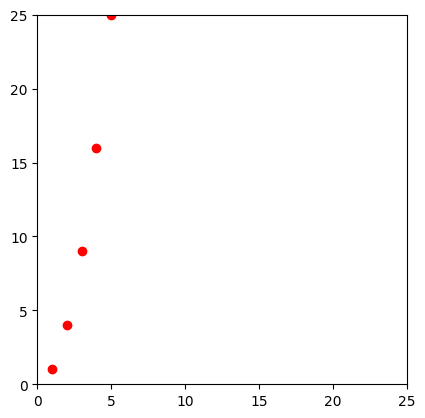

In [5]:
plt.axes().set_aspect('equal')
plt.xlim(0,25)
plt.ylim(0,25)

plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole encore")

## Première partie : classification 

### Introduction
Passons maintenant aux choses sérieuses. On va considérer que l'on a des données de deux types différents (appelons les "rouge" et "bleu"), caractérisées par deux valeurs entre 0 et 1. 
On pourrait alors avoir une visualisation comme ceci: 

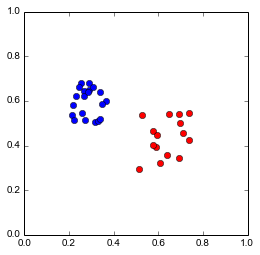

In [64]:
from IPython.display import Image
Image(filename="TP/blobs2.png")

Le but de ce TP est de définir un moyen de "classer" une nouvelle donnée pour dire si elle est plutôt de la classe bleue ou rouge. 
Pour cela, un moyen simple (voire simplet, mais vous creuserez la question au 2e semestre), est de calculer le barycentre
(centre de gravité) des points de chaque classe, ici en jaune:  

<img src="TP/blobs2_centres.png">

Puis de considérer leur médiatrice:   

<img src="TP/blobs2_separateur.png">

Et enfin de considérer que tout ce qui est du même côté que le groupe bleu/rouge doit être bleu/rouge:  

<img src="TP/classif_barycentre.png">

Evidemment, ça ne marchera pas pour tout type de données:   

<img src="TP/classif_ouch.png">

Cette méthode nécessite que les données soit séparables linéairement. Mais passons. 

### Génération et affichage de nuages de point
En utilisant la fonction random.random(), faire une fonction qui génère un "nuage" de n points autour d'une position donnée ($x_0$,$y_0$), avec un étalage réglable (distance maxi par rapport à la position donnée). Par exemple, la figure initiale a été générée avec les paramètres (vous être libre du nom de la fonction):

```
g1 = blob(0.3,0.6,20,scale=0.1)
g2 = blob(0.6,0.4,15,scale=0.15)
``` 

La fonction renvoie juste les coordonnées.   
Ecrivez aussi une fonction qui prend la sortie de "blob" et fait la figure du nuage en utilisant plt.plot

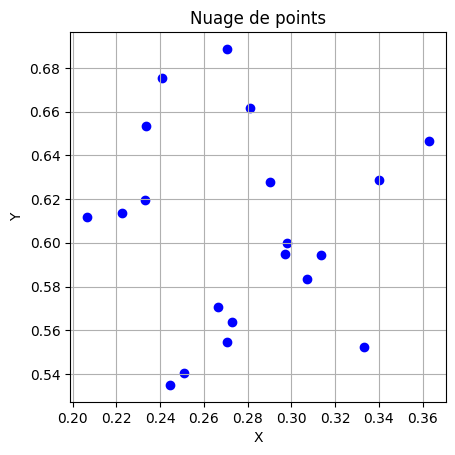

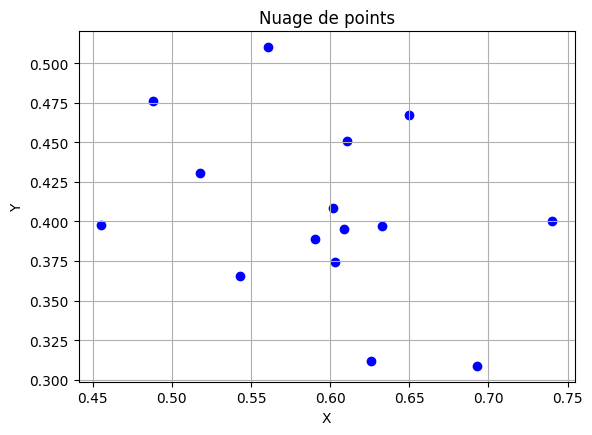

In [130]:
import random
import math
import matplotlib.pyplot as plt

def blob(x0, y0, n, scale=1.0):
    """
    Génère un nuage de n points autour de la position (x0, y0) avec un étalage réglable.

    Args:
        x0 (float): Coordonnée x de la position centrale.
        y0 (float): Coordonnée y de la position centrale.
        n (int): Nombre de points à générer.
        scale (float): Étalage du nuage (distance maximale par rapport à la position donnée).

    Returns:
        list: Une liste de tuples contenant les coordonnées des points générés.
    """
    points = []
    for _ in range(n):
        # Générer des coordonnées aléatoires dans un cercle de rayon 'scale'
        r = random.uniform(0, scale)
        theta = random.uniform(0, 2 * 3.14159265359)  # 2 * pi
        x = x0 + r * math.cos(theta)
        y = y0 + r * math.sin(theta)
        points.append((x, y))
    return points

def plot_blob(points):
    """
    Affiche la figure du nuage de points.

    Args:
        points (list): Une liste de tuples contenant les coordonnées des points.
    """
    x, y = zip(*points)  # Sépare les coordonnées en listes x et y
    plt.axes().set_aspect('equal')
    plt.scatter(x, y, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nuage de points')
    plt.grid(True)
    plt.show()

# Exemple d'utilisation:
g1 = blob(0.3, 0.6, 20, scale=0.1)
g2 = blob(0.6, 0.4, 15, scale=0.15)

# Afficher la figure du nuage
plot_blob(g1)
plot_blob(g2)



### Fonction qui détermine le centre d'un groupe

Voici une fonction qui calcule le séparateur de deux groupes (la médiatrice): pour cela il suffit de renvoyer un point de la droite, par exemple le milieu M des centres des 2 groupes, et un vecteur normal à la droite $\vec{w}$ (par exemple le vecteur défini par les deux centres). La fonction suppose que la fonction "centre" a déjà été écrite, 
et que g1, g2, c1 et c2 sont des vecteurs ou matrices numpy. Adaptez si vous avez fait différemment pour les fonctions blob et centre. 

La fonction qui affiche le séparateur est donnée aussi

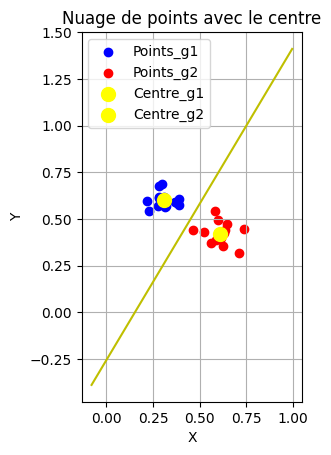

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def center_of_group(points):
    """
    Calcule le centre d'un groupe de points en calculant la moyenne des coordonnées x et y à l'aide de NumPy.
    Args :      points (list): Une liste de tuples contenant les coordonnées des points.
    Returns :   tuple: Un tuple contenant les coordonnées x et y du centre.
    """
    if not points:
        return None

    # Converti la liste de points en un tableau numPy
    points_np = np.array(points)

    # Calcul de la moyenne avec la fonction "mean" de numpy
    center_x = np.mean(points_np[:, 0])
    center_y = np.mean(points_np[:, 1])

    return (center_x, center_y)

def separateur(g1, g2):
    """Renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice."""
    c1 = center_of_group(g1)
    c2 = center_of_group(g2)
    m = 0.5 * (np.array(c1) + np.array(c2))
    c1x, c1y = c1
    c2x, c2y = c2

    # Extraire les coordonnées x et y des points
    x1, y1 = zip(*g1)
    x2, y2 = zip(*g2)

    # Tracer les points
    plt.axes().set_aspect('equal')
    plt.scatter(x1, y1, label='Points_g1', color='blue')
    plt.scatter(x2, y2, label='Points_g2', color='red')

    # Tracer le centre du groupe
    plt.scatter(c1[0], c1[1], label='Centre_g1', color='yellow', marker='o', s=100)
    plt.scatter(c2[0], c2[1], label='Centre_g2', color='yellow', marker='o', s=100)

    return (m, (c1x - c2x, c1y - c2y))

def plot_separateur(m, w, scale=3):
    """À partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1], w[0])
    plt.plot([m[0] + scale * tw[0], m[0] - scale * tw[0]], [m[1] + scale * tw[1], m[1] - scale * tw[1]], "y-")

# Exemple d'utilisation
g1 = blob(0.3, 0.6, 20, scale=0.1)
g2 = blob(0.6, 0.4, 15, scale=0.15)

# Calculer le séparateur et le tracer avec les points
separation_point, separation_vector = separateur(g1, g2)
plot_separateur(separation_point, separation_vector)

# Affichage du graphique
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nuage de points avec le centre')
plt.legend()
plt.grid(True)
plt.show()

**Sortie attendue**

<img src="TP/blobs2_separateur.png">

**Conclusion**  
On retrouve bien le graphique demandé avec les mêmes couleurs, sans changer les paramètres des fonctions.  
Je me suis tout de même permis d'ajouter le code du tracé des points dans la fonction `seprateur`.  
Afin de rendre les paramètres partageables (en créant des attributs) et triés les fonctions judicieusement, je pense regrouper les fonctions/méthodes dans un décorateur, à l'avenir.  

### Classification

Ecrivez une fonction qui classifie un point P par rapport à cette droite: ici le critère est déterminé par rapport à l'angle entre $\vec{MP}$ et $\vec{w}$, soit $cos(\vec{MP},\vec{w})>0$ (ou inférieur), ou encore
$\vec{MP}\cdot\vec{w}>0$ (ou inférieur).  
Ensuite générer des points au hasard avec des coordonnées entre 0 et 1, et afficher les comme des croix (symbole 'x') avec la couleur correspondant à la classe prédite par la fonction précédente.

**Bonus**   
Vous pouvez essayer aussi avec des données "tordues", cf certains jeux de test de la librairie scikit-learn (et faire un peu de numpy !)

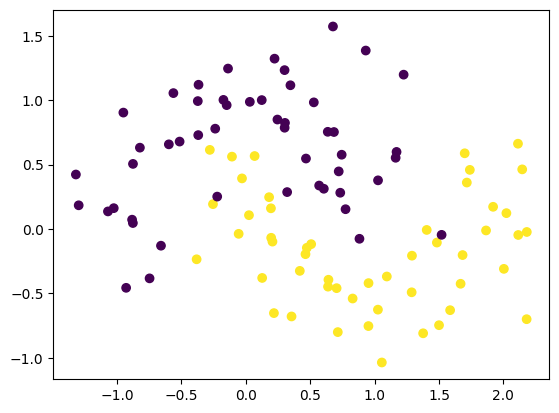

In [73]:
from sklearn.datasets import make_moons, make_circles
d = make_moons(noise=0.3, random_state=0)
xy, c = d
plt.scatter(xy[:,0],xy[:,1],c=c)

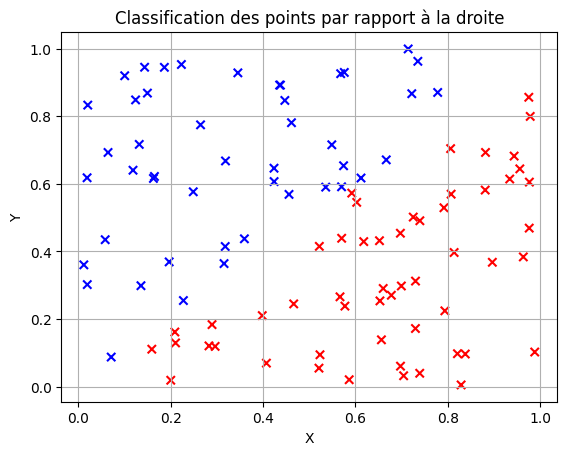

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Fonction pour classer un point P par rapport à une droite définie par M et w
def classify_point(P, M, w):
    """
    Classe un point P par rapport à une droite définie par M et w en utilisant le critère cos(MP, w).

    Args:
        P (tuple): Coordonnées du point à classer (x, y).
        M (tuple): Coordonnées du point sur la droite (x, y).
        w (tuple): Vecteur directeur de la droite (dx, dy).

    Returns:
        int: 1 si P est du côté positif de la droite, -1 sinon.
    """
    MP = np.array(P) - np.array(M)
    cos_angle = np.dot(MP, w) / (np.linalg.norm(MP) * np.linalg.norm(w))
    return 1 if cos_angle > 0 else -1

# Génération de données aléatoires entre 0 et 1
np.random.seed(0)
num_points = 100
xy = np.random.rand(num_points, 2)

# Définition de la droite (point M et vecteur directeur w)
M = (0.5, 0.5)
w = (1, -1)

# Classification des points par rapport à la droite
classifications = [classify_point(P, M, w) for P in xy]

# Affichage des points avec des couleurs en fonction de la classification
colors = ['r' if c == 1 else 'b' for c in classifications]
plt.scatter(xy[:, 0], xy[:, 1], c=colors, marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classification des points par rapport à la droite')
plt.grid(True)
plt.show()

## Deuxième partie: de "vraies" données
### Introduction

Vous pouvez maintenant utiliser le fichier "iris.txt", en annexe du sujet.  
Celui-ci contient des caractéristiques de différentes fleurs de l'espèce iris, réparties en trois sous-espèces "setosa", "virginica", "versicolor".  
Vous pouvez utiliser numpy pour lire directement les données: 

In [10]:
import numpy as np
data = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

Si on regarde le résultat, on voit que cela donne une matrice de tuples, avec les caractéristiques et la classe de chaque instance. On a aussi une liste de noms des "colonnes" de ces données: 

In [11]:
data[:4]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')],
      dtype=[('sepal_l', '<f8'), ('sepal_w', '<f8'), ('petal_l', '<f8'), ('petal_w', '<f8'), ('classe', '<U15')])

On peut alors récupérer les colonnes par leur nom: 

In [12]:
data["classe"][:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [13]:
data["sepal_l"][:10]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

### Afficher 2 caractéristiques
Faire une fonction qui affiche 2 caractéristiques choisies sur ces données, donnant une couleur différente à chaque groupe. Utilisez les fonctionalités de numpy.  

Cette fonction possède comme parmètre d'entrée :
* `data (numpy.ndarray)`: Tableau NumPy contenant les données iris.
* `feature1_name (str)`: Nom de la première caractéristique à afficher.
* `feature2_name (str)`: Nom de la deuxième caractéristique à afficher.

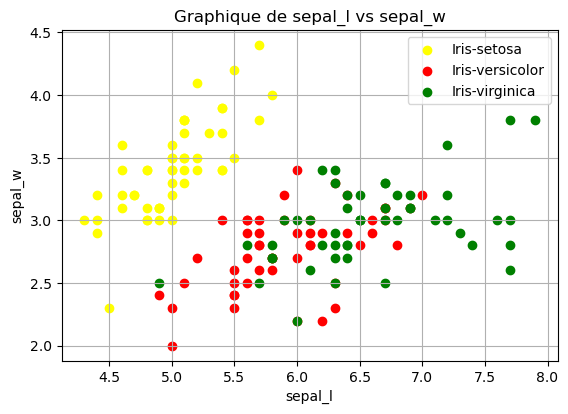

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def plot_features(data, feature1_name, feature2_name): # Affiche deux caractéristiques choisies des données iris avec des couleurs différentes pour chaque groupe.
    # Créer un dictionnaire de couleurs pour chaque groupe de classe
    color_dict = {'Iris-setosa': 'yellow','Iris-versicolor': 'red','Iris-virginica': 'green'}

    # Extraire les valeurs des caractéristiques à partir du tableau NumPy
    feature1 = data[feature1_name]
    feature2 = data[feature2_name]

    # Extraire les classes
    classes = data["classe"]

    # Tracer les points en utilisant différentes couleurs pour chaque classe
    plt.axes().set_aspect('equal')
    for cls in np.unique(classes):
        plt.scatter(feature1[classes == cls], feature2[classes == cls], label=cls, c=color_dict[cls])

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.legend()
    plt.grid(True)
    plt.title(f'Graphique de {feature1_name} vs {feature2_name}')

# Charger les données iris
data = np.genfromtxt('iris.txt', dtype=None, delimiter=',', names=True, encoding=None)

# Exemple d'utilisation de la fonction pour afficher deux caractéristiques (par exemple, sepal_l et sepal_w)
plot_features(data, "sepal_l", "sepal_w")
plt.show()

**Sortie attendue**

<img src="TP/iris_test.png">       

### Trouver les séparateur de données
Appliquer la première partie pour trouver des séparateurs des données, en considérant qu'il faut un séparateur pour chaque groupe par rapport aux deux autres ensembles (toujours restreint à deux caractéristiques).  
Trouver les 2 meilleures caractéristiques à prendre pour une bonne séparation (à l'oeil). 

Cette fonction possède plusieurs paramètres d'entrée :
* `X (numpy.ndarray)`: Les données d'entraînement.
* `y (numpy.ndarray)`: Les étiquettes de classe.
* `feature_names (list)`: La liste des noms de caractéristiques.
* `feature_indices (tuple)`: L'indice des caractéristiques à utiliser.
* `ax (matplotlib.axes._subplots.AxesSubplot)`: Le sous-graphique où afficher le séparateur.

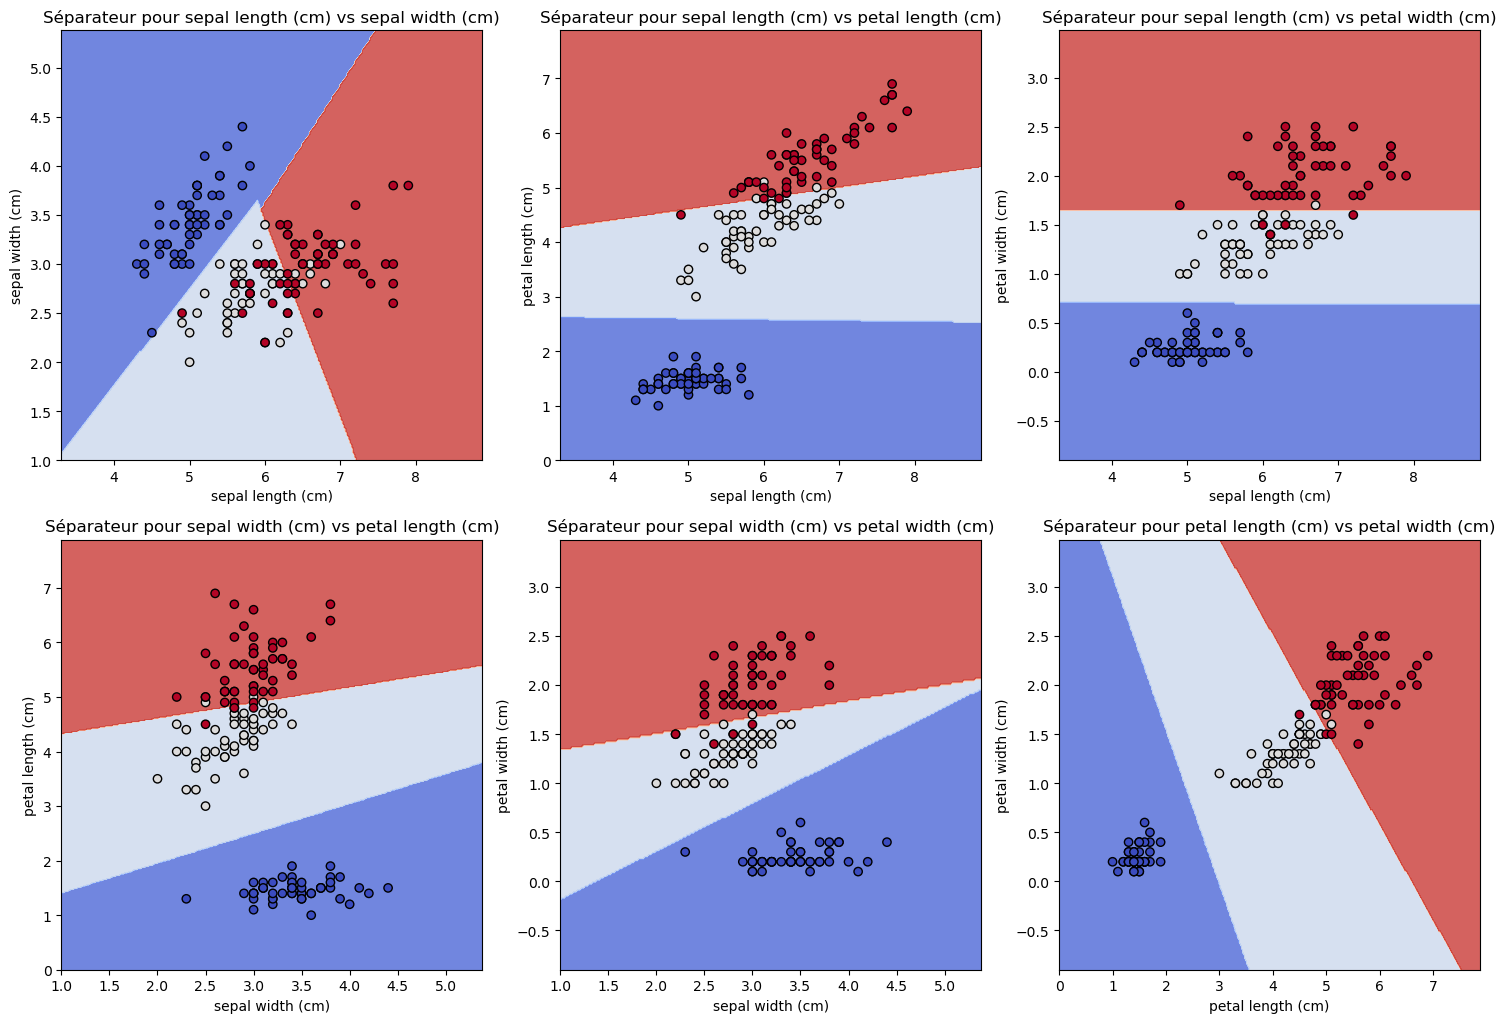

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

def plot_separator(X, y, feature_names, feature_indices, ax):
    X_subset = X[:, feature_indices]                                            # Crée un sous-ensemble de données avec les caractéristiques sélectionnées

    # Crée un modèle SVM linéaire
    clf = SVC(kernel='linear')
    clf.fit(X_subset, y)

    # Génère la grille de points pour le tracé du séparateur
    h = .02                                                                     # Taille de la maille
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                              # Faire des prédictions pour chaque point dans la grille
    Z = Z.reshape(xx.shape)                                                     # Modifier la forme de Z pour correspondre à la grille

    # Trace les séparateurs et les marges sur le sous-graphique correspondant
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel(feature_names[feature_indices[0]])
    ax.set_ylabel(feature_names[feature_indices[1]])
    ax.set_title(f'Séparateur pour {feature_names[feature_indices[0]]} vs {feature_names[feature_indices[1]]}')

# Charge les données iris
data = load_iris()
X = data.data                                                               # Caractéristiques
y = data.target                                                             # Classes
feature_names = data.feature_names                                          # Liste des noms des caractéristiques
feature_combinations = [(i, j) for i in range(4) for j in range(i + 1, 4)]  # Crée une liste de combinaisons possibles de caractéristiques

# Crée et affiche une disposition de sous-graphiques avec plusieurs colonnes
num_cols = 3                                                                # Nombre de colonnes dans la disposition
num_rows = len(feature_combinations) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))              # Crée la disposition des sous-graphiques
for i, feature_indices in enumerate(feature_combinations):                  # Affiche les différentes combinaisons de caractéristiques et les séparateurs
    row = i // num_cols
    col = i % num_cols
    plot_separator(X, y, feature_names, feature_indices, axes[row, col])    # Affiche le séparateur sur le sous-graphique correspondant
for i in range(len(feature_combinations), num_cols * num_rows):             # Supprime les sous-graphiques vides s'il y en a
    fig.delaxes(axes.flatten()[i])
fig.tight_layout()                                                          # Ajuste automatiquement l'espacement entre les sous-graphiques
plt.show()                                                                  # Affiche les graphiques

### Calcul d'un sépérateur et du taux d'erreur
Pour les 2 caractéristiques choisies, et en restreignant sur 90% des instances, calculez un séparateur entre la classe Iris-setosa et les 2 autres, puis évaluez le taux d'erreur de votre séparateur sur les 10% restants.

Pour faciliter le codage nous utiliseront un module de sklearn : **SVC**  
SVC signifie *"Support Vector Classification"* en anglais, et c'est un algorithme d'apprentissage automatique utilisé pour résoudre des problèmes de classification.  
Plus précisément, il s'agit d'un type de modèle SVM (Support Vector Machine) utilisé pour classer des données en deux ou plusieurs classes.

**Pour mieux comprendre le code**

1. **Création du modèle SVM**  
Dans la fonction plot_separator, un modèle SVM est créé avec le noyau linéaire à l'aide de la ligne `clf = SVC(kernel='linear')`.  
Le noyau linéaire signifie que le modèle tente de trouver un hyperplan (une ligne ou un plan dans l'espace en fonction du nombre de caractéristiques) qui sépare les exemples de différentes classes.

2. **Entraînement du modèle SVM**  
Le modèle SVM est entraîné sur un sous-ensemble des données d'entraînement.   
Les données sont projetées dans l'espace défini par les deux caractéristiques sélectionnées, et le modèle apprend à trouver l'hyperplan qui maximise la marge entre les exemples de différentes classes.

3. **Prédictions**  
Une fois le modèle entraîné, il peut être utilisé pour faire des prédictions sur de nouvelles données.   
Dans le code, les prédictions sont faites sur un ensemble de données de test à l'aide de la ligne `y_pred = clf.predict(X_test)`.

4. **Évaluation du modèle**  
Le code calcule ensuite le taux d'erreur en comparant les prédictions du modèle aux étiquettes réelles des données de test à l'aide de la ligne `error_rate = 1.0 - accuracy_score(y_test, y_pred)`.   
Cela donne une mesure de la précision du modèle pour classer les données de test en fonction des deux caractéristiques sélectionnées.

In [104]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger les données iris
data = load_iris()
X = data.data                           # Caractéristiques
y = data.target                         # Classes
feature_names = data.feature_names      # Liste des noms des caractéristiques
error_rates = []                        # Liste pour stocker les taux d'erreur

# Boucle sur les différentes combinaisons de caractéristiques
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        feature_indices = (i, j)                                                                                            # Sélectionne les deux caractéristiques
        X_subset = X[:, feature_indices]                                                                                    # Crée un sous-ensemble de données avec les caractéristiques sélectionnées
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.1, random_state=42, stratify=y)        # Divise l'ensemble de données en 90% d'entraînement et 10% de test
        clf = SVC(kernel='linear')                                                                                          # Crée un modèle SVM linéaire
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)                                                                                        # Fait des prédictions sur les données de test
        error_rate = 1.0 - accuracy_score(y_test, y_pred)                                                                   # Calcule le taux d'erreur en comparant les prédictions aux étiquettes réelles
        error_rates.append([feature_names[i], feature_names[j], error_rate])                                                # Ajoute le taux d'erreur à la liste

error_rates.sort(key=lambda x: x[2])                                                                                        # Trie la liste des taux d'erreur par ordre croissant

# Afficher le tableau comparatif des taux d'erreur
print("Tableau comparatif des taux d'erreur :")
print("Caractéristique 1 | Caractéristique 2 | Taux d'erreur")
for error_rate in error_rates:
    print(f"{error_rate[0]:<17} | {error_rate[1]:<17} | {error_rate[2] * 100:.2f}%")

# Afficher le meilleur taux d'erreur et les caractéristiques correspondantes
best_error_rate = error_rates[0]
print(f"\nMeilleur taux d'erreur : {best_error_rate[2] * 100:.2f}%")
print(f"Caractéristiques : {best_error_rate[0]} et {best_error_rate[1]}")


Tableau comparatif des taux d'erreur :
Caractéristique 1 | Caractéristique 2 | Taux d'erreur
sepal length (cm) | petal length (cm) | 6.67%
sepal width (cm)  | petal length (cm) | 6.67%
petal length (cm) | petal width (cm)  | 6.67%
sepal length (cm) | petal width (cm)  | 13.33%
sepal width (cm)  | petal width (cm)  | 13.33%
sepal length (cm) | sepal width (cm)  | 33.33%

Meilleur taux d'erreur : 6.67%
Caractéristiques : sepal length (cm) et petal length (cm)


**Conclusion**  
En conclusion, les caractéristiques **"sepal length (cm)"** et **"petal length (cm)"** offrent la meilleure performance en termes de séparation des classes pour le jeu de données Iris, avec un taux d'erreur de seulement 6.67%.  
En d'autres termes, cela **suggère que ces deux caractéristiques sont les plus "informatives" pour différencier la classe "Iris-setosa" des autres classes**.